<a href="https://colab.research.google.com/github/hongrolee/Machine-Learning/blob/main/%EC%A0%9C%ED%92%88_%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1(Web_Service)_%EB%8B%A4%ED%95%AD_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제품의 무게 예측해 보기

## 다항 회귀 알고리즘

### 제품의 가로, 두께 생성하기

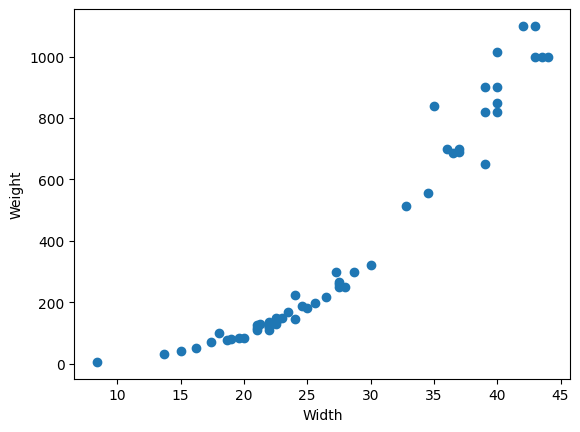

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

product_width = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
product_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

plt.scatter(product_width, product_weight)
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()


### 사이킷런을 이용하여 훈련 및 테스트 데이터 생성하기

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_answer, test_answer = train_test_split(product_width, product_weight, random_state=42)

train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

train_square = np.column_stack((train_data ** 2, train_data))
test_square = np.column_stack((test_data ** 2, test_data))

print(train_data.shape, test_data.shape)
print(train_square.shape, test_square.shape)
print(train_square)

(42, 1) (14, 1)
(42, 2) (14, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


### 선형 회귀 알고리즘을 적용하여 학습하기(모델생성)

In [ ]:
from sklearn.linear_model import LinearRegression
import joblib

model = LinearRegression()
model.fit(train_square, train_answer)

joblib.dump(model,"polynomial_model.pkl")

['polynomial_model.pkl']

### Width 50cm를 넣어 무게 예측해보기

In [ ]:
print(model.predict([[50**2,50]]))

[1573.98423528]


### 계수와 절편 출력하기

In [ ]:
print(model.coef_, model.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


### 50cm 제품의 최근접 이웃들을 산점도에 표시하기

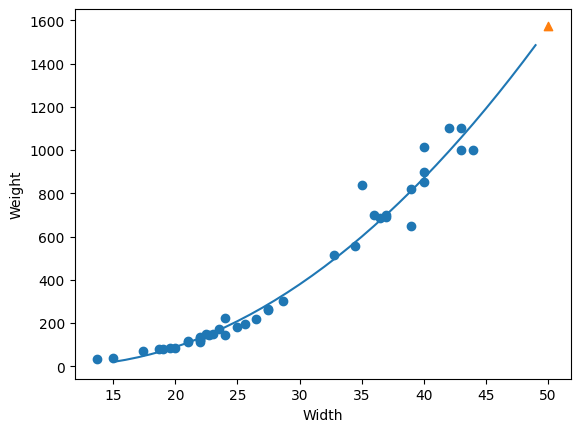

In [ ]:
import matplotlib.pyplot as plt

width = np.arange(15,50)

plt.scatter(train_data, train_answer)
plt.plot(width, 1.01*width**2 + (-21.55)*width + 116.0502107827827)
 
plt.scatter(50, 1574, marker='^')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()

### Training Set와 Test Set의 모델 평가해보기

In [ ]:
print('Training Set : ' + str(model.score(train_square, train_answer)))
print('Test Set     : ' + str(model.score(test_square, test_answer)))

Training Set : 0.9706807451768623
Test Set     : 0.9775935108325122
